<a href="https://colab.research.google.com/github/Mumo-vicky/House-Prices-Prediction/blob/master/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

### **Problem definition**

I work for Hass Consulting Company which is a real estate leader with over 25 years of experience. I have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

I am suppossed to evaluate different regression models in order to find the most accurate for prediction of house prices based on the variables provided.

## **Metrics For Success**


The following are the goals for the project to be deemed successful.:

Discuss the factors that contribute the most and the least to the pricing of a house from the data given.
Obtain an appropriate metic for evaluating all the five models and interpret the findings obtained on the metrics.
Draw conclusions and recommendations from the models

## **Data Understanding**

Our data Contains the following columns.
* Id
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15

## **Experimental design**

The following are the tasks that I am going to perform:
* Load the datasets
* Data preparation
* Perform Exploratory analysis
* Check  for multicollinearity
* Fit regression models to the data
* Evaluate the models
* Conclusion
* Recommendations

**Loading apprpriate ibraries**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import scipy as sp
import statsmodels.formula.api as smf
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import ElasticNet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# **Data Preparation**

**Loading the Data**

In [5]:
#loading the data from the url provided.
data = pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")

## **Previewing Data**

In [6]:
#previewing the bottom
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
#previwing the bottom
data.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [8]:
#viewing the rows and columns.
data.shape

(21613, 20)

In [9]:
#checking for null, missing and duplicated values.
print("Null Values")
print(data.isnull().sum())
print("Missing Values")
print(data.isna().sum())
print("Duplicated Values:",data.duplicated().sum())

Null Values
id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Missing Values
id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64
Duplicated Values: 3


In [10]:
#dropping the duplicated values noted.
data = data.drop_duplicates()
data.duplicated().sum()

0

In [11]:
data.nunique()

id               21436
price             3625
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [12]:
#previewing numerical aspects of our data.
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161000e+04,2.161000e+04,21610.000000,21610.000000,21610.000000,2.161000e+04,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000,21610.000000
mean,4.580161e+09,5.401789e+05,3.370847,2.114739,2079.881212,1.510829e+04,1.494239,0.007543,0.234197,3.409440,7.656779,1788.347894,291.533318,1971.003609,84.322351,98077.945673,47.560049,-122.213910,1986.518695,12769.031976
std,2.876547e+09,3.673876e+05,0.930110,0.770204,918.500299,4.142323e+04,0.539994,0.086523,0.766136,0.650764,1.175500,828.138723,442.596699,29.372639,401.499264,53.505373,0.138572,0.140833,685.425781,27305.972464
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.216125e+05,3.000000,1.750000,1425.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470925,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068875e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [13]:
#checking for the data types for our columns.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21610 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21610 non-null  int64  
 1   price          21610 non-null  float64
 2   bedrooms       21610 non-null  int64  
 3   bathrooms      21610 non-null  float64
 4   sqft_living    21610 non-null  int64  
 5   sqft_lot       21610 non-null  int64  
 6   floors         21610 non-null  float64
 7   waterfront     21610 non-null  int64  
 8   view           21610 non-null  int64  
 9   condition      21610 non-null  int64  
 10  grade          21610 non-null  int64  
 11  sqft_above     21610 non-null  int64  
 12  sqft_basement  21610 non-null  int64  
 13  yr_built       21610 non-null  int64  
 14  yr_renovated   21610 non-null  int64  
 15  zipcode        21610 non-null  int64  
 16  lat            21610 non-null  float64
 17  long           21610 non-null  float64
 18  sqft_l

## **Cleaning and Tidying of the Data.**

In [14]:
#dropping the id column since we do not need it.
#defining the columns for later use in plotting.
data = data.drop(columns='id')
columns = data.columns
columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

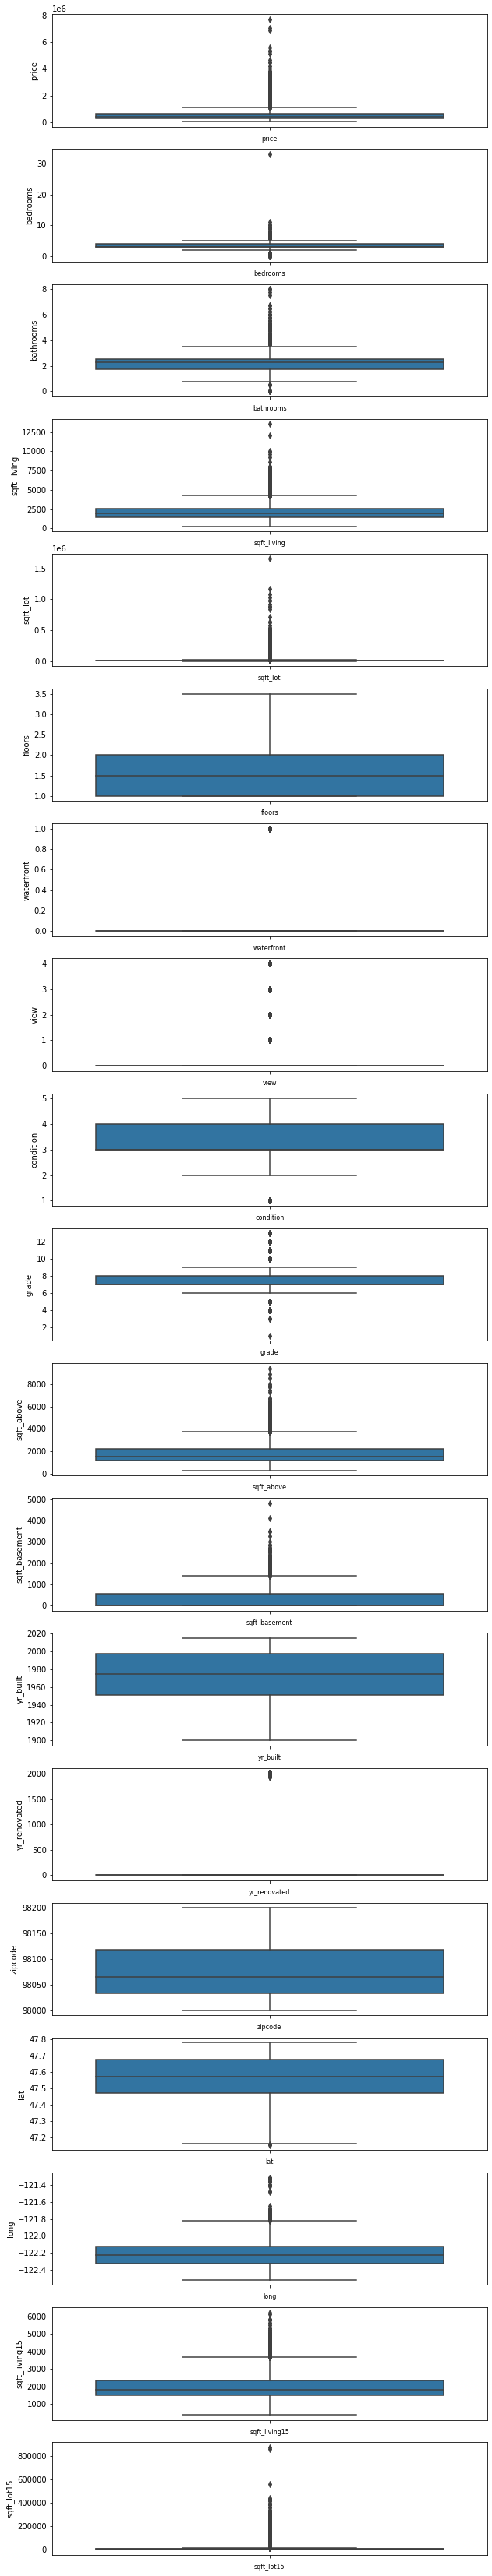

In [15]:
#plotting outliers in the data.
fig, ax = plt.subplots(len(columns), figsize = (10, 60))

for i, col_val in enumerate(columns):

  sns.boxplot(y= data[col_val], ax=ax[i])
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

Our data looks fairly clean, not having as many outliers. The only visible outliers that we can see is that in the bedrooms column and the year renovated column. I will check the bedrooms outlier but the year renovated column may be an actuality since houses may not have been renovated for a couple of years.

In [16]:
data.loc[data['bedrooms'] > 30]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


I am going to check the houses that have a price above 640000 to see whether there is any instance of such a high number of bedrooms.

In [17]:
data.loc[data['price'] > 600000]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
5,1230000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
10,662500.0,3,2.50,3560,9796,1.0,0,0,3,8,1860,1700,1965,0,98007,47.6007,-122.145,2210,8925
15,650000.0,4,3.00,2950,5000,2.0,0,3,3,9,1980,970,1979,0,98126,47.5714,-122.375,2140,4000
21,2000000.0,3,2.75,3050,44867,1.0,0,4,3,9,2330,720,1968,0,98040,47.5316,-122.233,4110,20336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,1580000.0,4,3.25,3410,10125,2.0,0,0,3,10,3410,0,2007,0,98040,47.5653,-122.223,2290,10125
21599,810000.0,4,3.00,3990,7838,2.0,0,0,3,9,3990,0,2003,0,98053,47.6857,-122.046,3370,6814
21600,1540000.0,5,3.75,4470,8088,2.0,0,0,3,11,4470,0,2008,0,98004,47.6321,-122.200,2780,8964
21605,610685.0,4,2.50,2520,6023,2.0,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023


The value is an outlier since the other houses have houses within 3 to 5. I will thus remove the input as it is an outlier.

In [18]:
#dropping the bedroom outlier.
data = data[data.bedrooms < 30]

## **Data Exploration**

### **Univariate Analysis.**

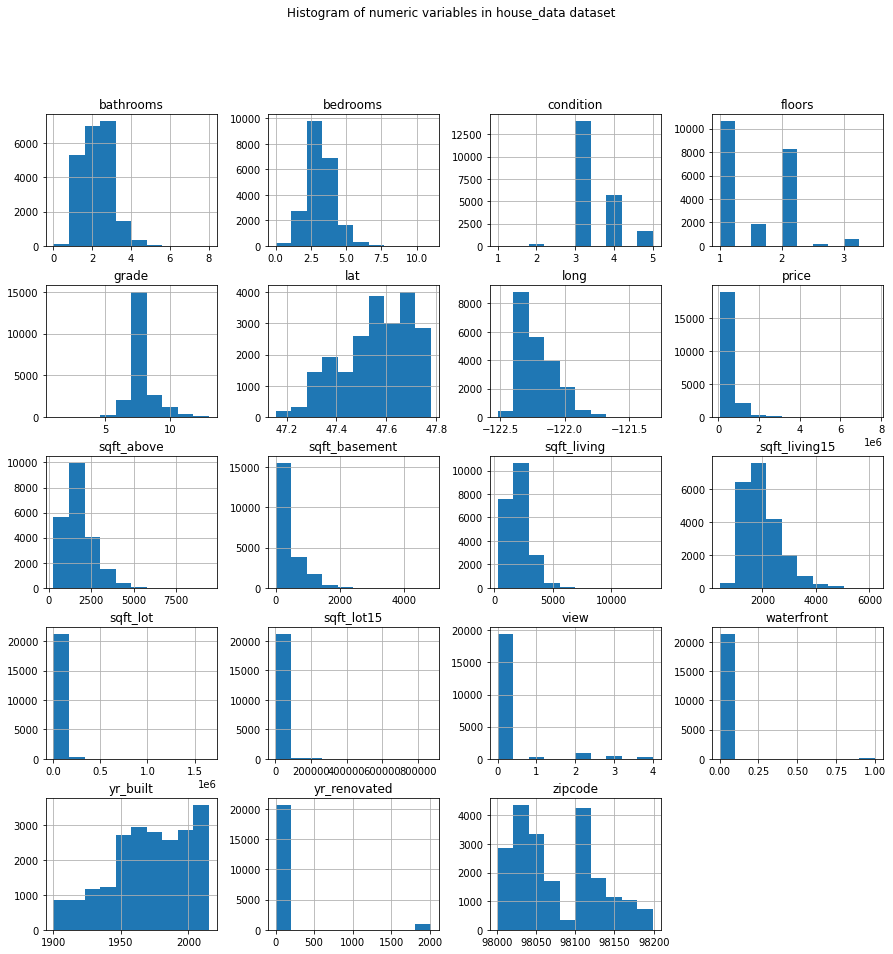

In [19]:
#plotting the histograms for the variables.
data.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables in house_data dataset")
plt.show()

### **Bivariate Analysis**

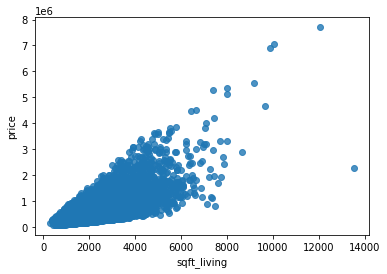

In [20]:
sns.regplot(y=data["price"], x=data["sqft_living"], fit_reg=False)

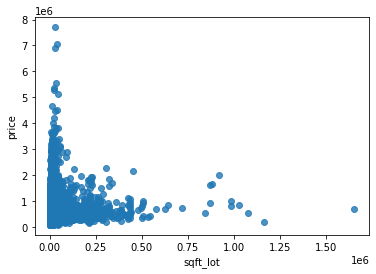

In [21]:
sns.regplot(y=data["price"], x=data["sqft_lot"], fit_reg=False)

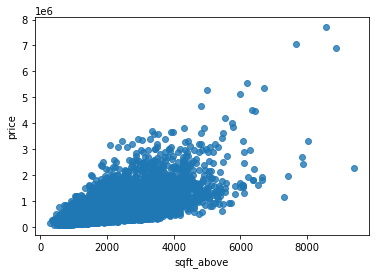

In [22]:
sns.regplot(y=data["price"], x=data["sqft_above"], fit_reg=False)

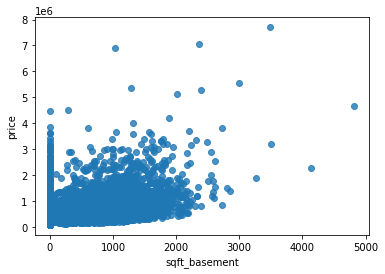

In [23]:
sns.regplot(y=data["price"], x=data["sqft_basement"], fit_reg=False)

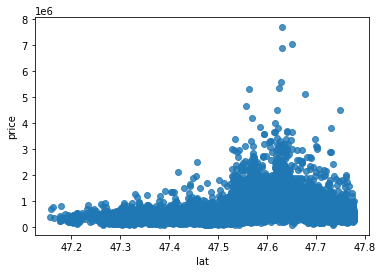

In [24]:
sns.regplot(y=data["price"], x=data["lat"], fit_reg=False)

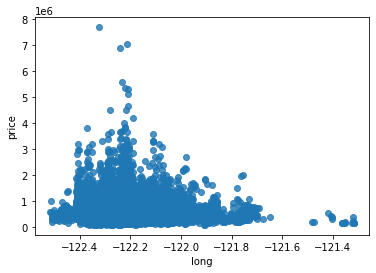

In [25]:
sns.regplot(y=data["price"], x=data["long"], fit_reg=False)

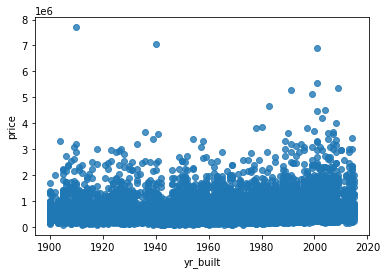

In [26]:
sns.regplot(y=data["price"], x=data["yr_built"], fit_reg=False)

From our bivariate analysis, we can infer that the relations between the different variables and the price of the houses differs. The building of the houses is spread out over the years and they don't seem to factor a lot in the price of the house.

### **Multivariate Analysis.**

In [27]:
#finding the correlations between the columns.
correlation = data.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.315442,0.525149,0.702057,0.089661,0.256810,0.266333,0.397471,0.036371,0.667491,0.605593,0.323844,0.053992,0.126506,-0.053168,0.306917,0.021578,0.585408,0.082461
bedrooms,0.315442,1.000000,0.529212,0.591471,0.032803,0.181105,-0.006612,0.081829,0.025426,0.366539,0.490619,0.309473,0.159268,0.019468,-0.157146,-0.010563,0.133883,0.402621,0.030391
bathrooms,0.525149,0.529212,1.000000,0.754685,0.087746,0.500661,0.063745,0.187886,-0.124904,0.664986,0.685348,0.283833,0.505989,0.050875,-0.203823,0.024611,0.223033,0.568659,0.087185
sqft_living,0.702057,0.591471,0.754685,1.000000,0.172826,0.353941,0.103819,0.284636,-0.058720,0.762716,0.876601,0.435076,0.318087,0.055310,-0.199426,0.052544,0.240207,0.756418,0.183280
sqft_lot,0.089661,0.032803,0.087746,0.172826,1.000000,-0.005181,0.021600,0.074750,-0.008944,0.113640,0.183521,0.015278,0.053098,0.007675,-0.129607,-0.085672,0.229547,0.144614,0.718555
floors,0.256810,0.181105,0.500661,0.353941,-0.005181,1.000000,0.023708,0.029312,-0.263717,0.458140,0.523856,-0.245653,0.489330,0.006147,-0.059007,0.049634,0.125312,0.279832,-0.011263
waterfront,0.266333,-0.006612,0.063745,0.103819,0.021600,0.023708,1.000000,0.401992,0.016665,0.082783,0.072078,0.080588,-0.026163,0.092950,0.030279,-0.014268,-0.041908,0.086467,0.030700
view,0.397471,0.081829,0.187886,0.284636,0.074750,0.029312,0.401992,1.000000,0.045877,0.251372,0.167650,0.277009,-0.053242,0.103206,0.084845,0.006062,-0.078573,0.280397,0.072573
condition,0.036371,0.025426,-0.124904,-0.058720,-0.008944,-0.263717,0.016665,0.045877,1.000000,-0.144612,-0.158135,0.174023,-0.361310,-0.060847,0.002910,-0.015078,-0.106435,-0.092760,-0.003391
grade,0.667491,0.366539,0.664986,0.762716,0.113640,0.458140,0.082783,0.251372,-0.144612,1.000000,0.755915,0.168463,0.446955,0.014367,-0.184785,0.114113,0.198330,0.713204,0.119259


We can see that there is higher correlation between price and the following:

* Bathrooms
* Living room area
* Grade
* Squarefeet above
* Sqft_living15

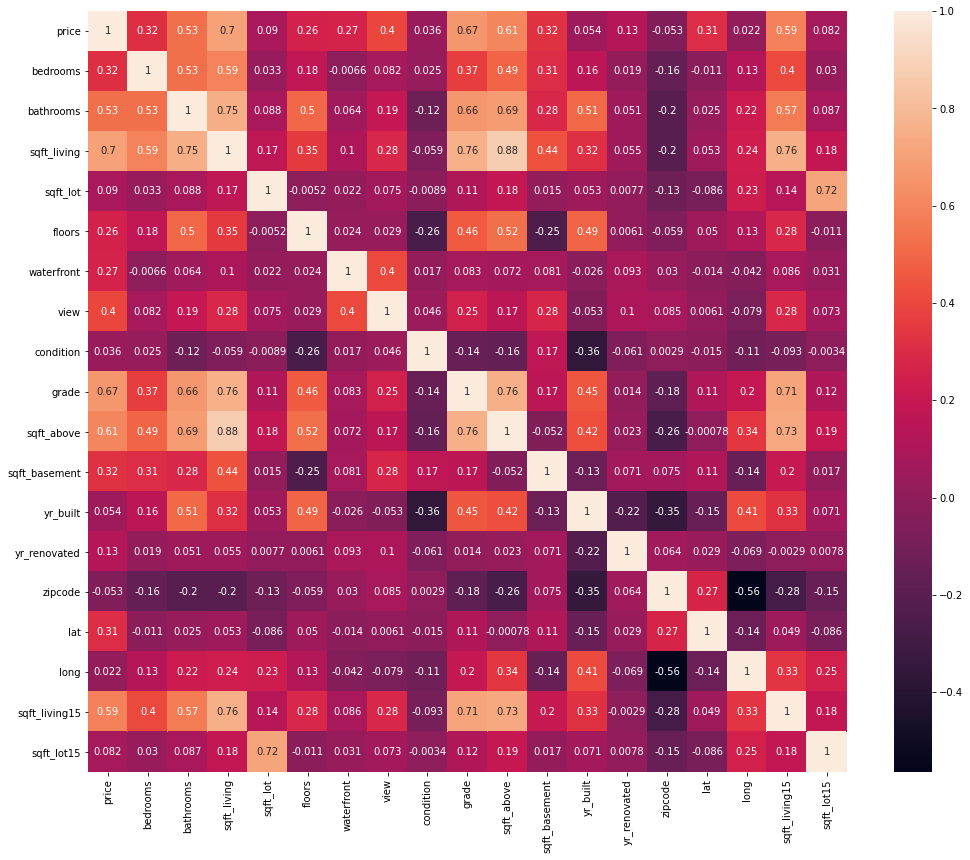

In [28]:
#viewing the correlations heatmap
plt.figure(figsize=(17, 14))
sns.heatmap(correlation, annot = True)

### **Multicollinearity**

We create a new data frame where we only have our independent variables so that we can check for multicolliearity within them using the variance inflation factor.

In [29]:
#creating the dataframe
independent = data.drop(columns='price')

In [30]:
#viewing their correlation
ind_corr = independent.corr()
ind_corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.529212,0.591471,0.032803,0.181105,-0.006612,0.081829,0.025426,0.366539,0.490619,0.309473,0.159268,0.019468,-0.157146,-0.010563,0.133883,0.402621,0.030391
bathrooms,0.529212,1.000000,0.754685,0.087746,0.500661,0.063745,0.187886,-0.124904,0.664986,0.685348,0.283833,0.505989,0.050875,-0.203823,0.024611,0.223033,0.568659,0.087185
sqft_living,0.591471,0.754685,1.000000,0.172826,0.353941,0.103819,0.284636,-0.058720,0.762716,0.876601,0.435076,0.318087,0.055310,-0.199426,0.052544,0.240207,0.756418,0.183280
sqft_lot,0.032803,0.087746,0.172826,1.000000,-0.005181,0.021600,0.074750,-0.008944,0.113640,0.183521,0.015278,0.053098,0.007675,-0.129607,-0.085672,0.229547,0.144614,0.718555
floors,0.181105,0.500661,0.353941,-0.005181,1.000000,0.023708,0.029312,-0.263717,0.458140,0.523856,-0.245653,0.489330,0.006147,-0.059007,0.049634,0.125312,0.279832,-0.011263
waterfront,-0.006612,0.063745,0.103819,0.021600,0.023708,1.000000,0.401992,0.016665,0.082783,0.072078,0.080588,-0.026163,0.092950,0.030279,-0.014268,-0.041908,0.086467,0.030700
view,0.081829,0.187886,0.284636,0.074750,0.029312,0.401992,1.000000,0.045877,0.251372,0.167650,0.277009,-0.053242,0.103206,0.084845,0.006062,-0.078573,0.280397,0.072573
condition,0.025426,-0.124904,-0.058720,-0.008944,-0.263717,0.016665,0.045877,1.000000,-0.144612,-0.158135,0.174023,-0.361310,-0.060847,0.002910,-0.015078,-0.106435,-0.092760,-0.003391
grade,0.366539,0.664986,0.762716,0.113640,0.458140,0.082783,0.251372,-0.144612,1.000000,0.755915,0.168463,0.446955,0.014367,-0.184785,0.114113,0.198330,0.713204,0.119259
sqft_above,0.490619,0.685348,0.876601,0.183521,0.523856,0.072078,0.167650,-0.158135,0.755915,1.000000,-0.051897,0.423903,0.023225,-0.261149,-0.000785,0.343768,0.731859,0.194051


In [31]:
#plotting the VIF scores.
VIF=pd.DataFrame(np.linalg.inv(ind_corr.values), index = ind_corr.index, columns=ind_corr.columns)
VIF

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.708179,-0.488648,2.067323e-01,0.052558,0.051429,0.066943,0.120389,-0.047054,0.325733,-1.107333e+00,-6.092774e-01,0.144744,0.048712,0.084913,0.056560,0.017398,0.024038,0.090219
bathrooms,-0.488648,3.362129,-1.209962e+00,-0.025292,-0.676183,0.008564,-0.044867,-0.137923,-0.275381,-1.736268e-01,-4.910383e-01,-0.939565,-0.261578,0.039889,-0.043060,0.053665,0.092202,0.069490
sqft_living,0.194005,-1.197846,-4.827045e+13,0.049658,0.983513,-0.005151,-0.214448,-0.840275,-0.261274,4.352106e+13,2.325994e+13,-0.065527,-0.606935,-0.260367,-0.184712,0.343203,-0.875919,-0.165058
sqft_lot,0.052558,-0.025292,4.603029e-02,2.102667,0.045271,0.027546,-0.058823,0.030596,-0.053004,-2.426676e-01,-6.596182e-02,0.099175,0.021426,-0.002361,0.053566,-0.133195,0.163908,-1.459078
floors,0.051429,-0.676183,9.908513e-01,0.045271,2.011953,-0.005413,-0.039886,0.089866,-0.230281,-1.397198e+00,1.375796e-01,-0.481030,-0.079901,-0.170674,-0.127372,0.164281,0.272608,0.072797
waterfront,0.066943,0.008564,-4.953600e-03,0.027546,-0.005413,1.204185,-0.492505,-0.012723,0.050319,-1.103144e-01,-2.734635e-03,-0.020563,-0.065690,0.022829,0.010093,0.027251,0.054370,-0.018206
view,0.120389,-0.044867,-2.152069e-01,-0.058823,-0.039886,-0.492505,1.435878,-0.020969,-0.183574,2.277786e-01,-1.556890e-01,0.152555,-0.038859,-0.140206,0.119081,0.071950,-0.325422,-0.007025
condition,-0.047054,-0.137923,-8.395335e-01,0.030596,0.089866,-0.012723,-0.020969,1.249197,-0.054037,8.108383e-01,3.062585e-01,0.561662,0.206956,0.161374,0.063840,-0.006870,0.075885,-0.028117
grade,0.325733,-0.275381,-2.534438e-01,-0.053004,-0.230281,0.050319,-0.183574,-0.054037,3.422025,-1.393599e+00,-3.712849e-01,-0.636270,-0.070690,0.084451,-0.329498,0.393758,-0.911700,0.073197
sqft_above,-1.101287,-0.172478,4.352106e+13,-0.246466,-1.392610,-0.110250,0.228012,0.811821,-1.388122,-3.923897e+13,-2.097136e+13,0.571714,0.543930,0.155530,0.343817,-0.651301,-0.745516,-0.030576


We are able to see that sqft_living, sqft_above and sqft_basement have very high values(higher than 5) and we are going to remove them inorder to see if there will be any change.

In [32]:
#dropping the columns.
#creating a new data frame without the columns.
vif_most = ['sqft_living', 'sqft_above', 'sqft_basement']
independent_new = independent.drop(columns = vif_most, axis = 1)

In [33]:
#a new vifs for the independent variables.
new_corr = independent_new.corr()
pd.DataFrame(np.linalg.inv(new_corr.values), index = new_corr.index, columns = new_corr.columns)

,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.494665,-0.836201,0.016679,0.075035,0.049601,0.084766,-0.054656,0.014828,0.256279,0.045849,0.060471,0.068998,-0.008598,-0.270525,0.054771
bathrooms,-0.836201,2.727164,-0.071221,-0.472922,-0.008918,-0.154130,-0.173928,-0.707007,-0.765794,-0.268713,-0.007165,-0.056233,0.073427,-0.317575,0.018725
sqft_lot,0.016679,-0.071221,2.094391,0.019538,0.022696,-0.055570,0.033576,-0.118664,0.119320,0.021391,-0.005158,0.061677,-0.148748,0.101850,-1.466285
floors,0.075035,-0.472922,0.019538,1.616844,-0.029083,0.086149,0.146975,-0.373203,-0.474829,-0.073692,-0.150663,-0.049175,0.019340,0.139194,0.060200
waterfront,0.049601,-0.008918,0.022696,-0.029083,1.201108,-0.487439,-0.009673,0.013509,-0.010296,-0.065539,0.021972,0.016290,0.015504,0.019625,-0.022162
view,0.084766,-0.154130,-0.055570,0.086149,-0.487439,1.391953,-0.039741,-0.180294,0.165399,-0.041169,-0.149668,0.096403,0.113594,-0.322936,-0.007801
condition,-0.054656,-0.173928,0.033576,0.146975,-0.009673,-0.039741,1.240859,-0.039690,0.562976,0.206009,0.158022,0.052875,0.013395,0.089192,-0.027012
grade,0.014828,-0.707007,-0.118664,-0.373203,0.013509,-0.180294,-0.039690,2.889219,-0.465489,-0.072197,0.056680,-0.275444,0.289135,-1.415599,0.014119
yr_built,0.256279,-0.765794,0.119320,-0.474829,-0.010296,0.165399,0.562976,-0.465489,2.372360,0.535335,0.269413,0.300854,-0.484895,0.239337,-0.013761
yr_renovated,0.045849,-0.268713,0.021391,-0.073692,-0.065539,-0.041169,0.206009,-0.072197,0.535335,1.150489,0.036418,0.045325,-0.052223,0.097787,-0.022218


Bathrooms, grade and floors are the variables that have shown a significant chage and this shows that they were highly correlated to the dropped columns. However, while bathrooms and grade decrease, floors increases.

# **Regressions.**

## **Linear regression**

I am going to perform linear regression first for my data inorder to have a baseline model for comparison and also see its perfomance.

In [54]:
#specification of the independent and dependent variables.
independent = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
dependent = ['price']

In [55]:
#Splitting the independent and dependent variables.
#spliting using train_test_split to training and test dataframes.
#fitting of the linear regression
x1 = data[independent]
y1 = data[dependent]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2,random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
#predicting the y using the linear regression and calculating the mean squared error.
y1a_pred = lin_reg.predict(x1_test)
lin_mod = (mean_squared_error(y1_test, y1a_pred)) 
print("Mean Squared Error for the linear model is:",lin_mod)

Mean Squared Error for the linear model is: 36936311603.22057


In [37]:
#reviewing the intercept and the coefficients.
print(lin_reg.intercept_)
print(lin_reg.coef_)

[6863493.08436299]
[[-4.11724789e+04  4.24881934e+04  1.13230410e+02  1.44127430e-01
   4.22091846e+03  6.27740015e+05  5.23785077e+04  2.64292721e+04
   9.56942995e+04  7.18440207e+01  4.13863890e+01 -2.60524328e+03
   2.11380155e+01 -5.93151496e+02  5.96355310e+05 -2.24237653e+05
   2.37871712e+01 -4.04092231e-01]]


In [57]:
y1_pred = lin_reg.fit(x1,y1).predict(x1)
lin_mod_mse = (mean_squared_error(y1, y1_pred)) 
print("Mean Squared Error for the linear model is:",lin_mod_mse)

Mean Squared Error for the linear model is: 40449409349.24975


This is the baseline mean squared error that we are going to use for comparrison

**Regularization**

I use the Variance Inflation factor in order for me to regularize the model to see if I will get better results.
I had already calculated the variance inflation factor and thus I know the columns that I have specified for use.

In [59]:
#creating a new dataframe excluding the columns specified according to the VIF
data_vif = data.drop(columns=vif_most)

In [60]:
#specifying the independent columns.
independent_a = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']

In [61]:
#splitting the data into the independent and dependent variables.
#splitting using train_test_split into training and testing dataframes.
#fitting the linear regression.
xa = data_vif[independent_a].values
ya = data_vif[dependent].values.reshape(-1,1)

xa_train, xa_test, ya_train, ya_test = train_test_split(xa, ya, test_size=0.2,random_state=0)

lin_reg = LinearRegression()
lin_reg.fit(xa_train, ya_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
#predicting the y variables using the linear regression
#calculating the mean squared error.
ya_pred = lin_reg.predict(xa_test)
lin_mod_a_mse = (mean_squared_error(ya_test, ya_pred))
print("Mean Squared Error for the linear model with the VIF analysed is:",lin_mod_a_mse)

Mean Squared Error for the linear model with the VIF analysed is: 41226707719.43003


The mean squared error for the regularized linear model is higher than the initial linear model and thus the initial/base linear model is better.

In [63]:
#displaying the itercept and the coefficients.
print(lin_reg.intercept_)
print(lin_reg.coef_)

[7639241.73751568]
[[-4.98464257e+03  1.07746702e+05  2.82178801e-01  1.04870628e+04
   6.74130657e+05  5.63963451e+04  2.61894914e+04  1.39197913e+05
  -3.18804033e+03  2.24586196e+01 -5.20692308e+02  5.72457397e+05
  -1.75410543e+05  9.34248032e+01 -1.66473133e-01]]


In [77]:
#finding residuals.
y1_pred = lin_reg.fit(x1,y1).predict(x1)
residuals = np.subtract(y1_pred, y1)
residuals = pd.DataFrame(residuals)
#residuals=pd.DataFrame(residuals).describe()
print(residuals.mean())

price    1.010340e-08
dtype: float64


In [78]:
residuals

,price
0,-14485.428365
1,198788.458130
2,202479.961451
3,-149989.923156
4,-69004.994186
...,...
21608,122915.537930
21609,36612.535419
21610,-258035.957184
21611,-14283.276398


ValueError: ignored

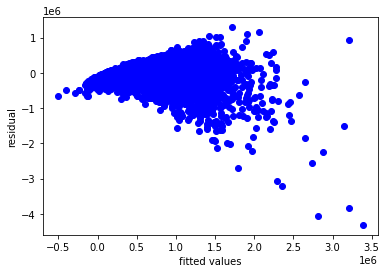

In [79]:
#plotting the residuals against the predicted values to see the shape of the plot for visualization of heteroscedasticity
plt.scatter(y1_pred, residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=2)
plt.show()

In [ ]:
#performing bartlett's test
test_result, p_value = sp.stats.bartlett(y1_pred.flatten(), residuals.flatten())

degree_of_freedom = len(y1_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

## **Quantile Regression**

I have performed the quantile regression with the dataframe that had vif regularization performed on it as errors arose with the initial dataset.

In [ ]:
#splitting the dataset into dependent and independent variables.
x2 = data[independent_a]
y2 = data[dependent]

In [ ]:
#fitting the quantile regression.
quant_mod = smf.quantreg('y2 ~ x2', data)
res = quant_mod.fit(q = 0.5)
print(res.summary())

In [ ]:
#creating a fuction for perfomance of the different models and looping through the models with a for loop while storing the parameters to a created dataframe.
quantiles = np.arange(0.1, 1, 0.1)
def fit_model(q):
    res = quant_mod.fit(q=q)
    models.append(res)
    return [q, res.params['Intercept'], res.params['x2[0]']] + res.conf_int().loc['x2[0]'].tolist()

models = [fit_model(x) for x in quantiles]
params = pd.DataFrame(data = models, columns=['qt', 'intercept', 'x2_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)

In [ ]:
#calculating for the mean squared error.
y2_pred = quant_mod.fit(q=.5).predict(x2)
quant_reg_mse = (mean_squared_error(y2, y2_pred))
print("The mean squared error for the quantile regression is:",quant_reg_mse)

The mean squared error for the quantile regression is still huge and this shows that it is also not accurate for prediction

## **Ridge Regression**

In [ ]:
x3 = data[independent]
y3 = data[dependent]

In [ ]:
rid_reg = Ridge(normalize=True)
search = GridSearchCV(estimator=rid_reg,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
search.fit(x3,y3)
print(search.best_params_)
abs(search.best_score_) 

In [ ]:
rid_reg = Ridge(normalize=True,alpha=0.01)
rid_reg.fit(x3,y3)
y3_pred = rid_reg.predict(x3)
rid_mod = (mean_squared_error(y3,y3_pred))
print("The mean squared error for the ridge regression model is:",rid_mod)

In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(rid_reg.coef_,x3.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(lin_reg.coef_,x3.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

## **Lasso Regression**

In [ ]:
x4 = data[independent]
y4 = data[dependent]

In [ ]:
scaler = StandardScaler()
scaler.fit(x4)
x4 = scaler.transform(x4)

In [ ]:
las_reg = linear_model.Lasso() 
las_reg.fit(x4, y4) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", las_reg.score(x4, y4)) 
print("lasso MSE:", mean_squared_error(y4, las_reg.predict(x4))) 
print("lasso coef:", las_reg.coef_) 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.2, random_state=100)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

#linear = linear_model.LinearRegression()
#lasso = linear_model.Lasso() 
grid_las_reg = GridSearchCV(las_reg, parameters, scoring ='r2') 

# Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
grid_las_reg.fit(x4_train, y4_train) 
lin_reg.fit(x4_train, y4_train) 
print("lasso best parameters:", grid_las_reg.best_params_) 
print("lasso score:", grid_las_reg.score(x4_test, y4_test))
print("lasso MSE:", mean_squared_error(y4_test, grid_las_reg.predict(x4_test)))
print("lasso best estimator coef:", grid_las_reg.best_estimator_.coef_)

In [ ]:
las_reg = linear_model.Lasso(alpha=0.1) 
las_reg.fit(x4, y4) 
print("The Lasso regression score is:", las_reg.score(x4, y4)) 


In [ ]:
y4_pred = las_reg.predict(x4)
las_reg_mse = mean_squared_error(y4, y4_pred)
print("The mean squared error for the Lasso Regression is :", las_reg_mse)

In [ ]:
print("The best estimator coefficient:", grid_las_reg.best_estimator_.coef_)

The Lasso regression does not reduce any coefficients to zero and this shows that it has failed as it cannot predict the most influential factors within the variables.

The mean squared error too is just a bit higher and thus it is not better compared to the linear model.

## **Elastic Net regression**

In [ ]:
#splitting our independent and dependent variables
x5 = data[independent]
y5 = data[dependent]

In [ ]:
#normalizing our data and creating a grid.
ela_reg=ElasticNet(normalize=True)
search=GridSearchCV(estimator=ela_reg,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
#fitting our data and displaying the appropriate parameters.
search.fit(x5,y5)
abs(search.best_score_)
print(search.best_params_)

In [ ]:
#substituting our parameters into the models and fitting it.
#finding the mean squared error for the model
ela_reg=ElasticNet(normalize=True,alpha=0.00001,l1_ratio=0.8)
ela_reg.fit(x5,y5)
y5_pred = ela_reg.predict(x5)
ela_reg_mse=(mean_squared_error(y5,y5_pred))
print("The mean squared error for the elastic net regression is:",ela_reg_mse)

In [ ]:
coef_dict_baseline = {}
for coef, feat in zip(ela_reg.coef_,x5.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

From our coefficients, we can see that latitude, longitude and waterfront highly affect the house price and this infers that the the three are huge determinants for the price of the house.

# **Conclusion and Recommendation**

In [ ]:
print("The mean Squared Error for the linear model is:",lin_mod_mse)
print("The mean squared error for the quantile regression is:",quant_reg_mse)
print("The mean squared error for the ridge regression model is:",rid_mod)
print("The mean squared error for the Lasso Regression is :", las_reg_mse)
print("The mean squared error for the elastic net regression is:",ela_reg_mse)

* We Can see that the linear model potrays the lowest mean squared error and this shows that it has the highest accuracy compared to the other models.
* From the elastic net model, we can derive that longitude, latitude and waterfront highly influence the price of the house.
* 